In [18]:
# Plotting colored results on a map.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import netCDF4

In [19]:
# read regional performance data
df = pd.read_csv("../data/plot_metrics_map/210919_hrncst_trajgru_fulldata_compare_v8.csv")

In [20]:
df.head()

,no.,i,j,Name,lon_min,lon_max,lat_min,lat_max,elevation_mean[m],slope,...,Rainymotion 10mm,Rainymotion 20mm,JMA Nowcast 10mm,JMA Nowcst 20mm,trajGRU Local 10mm,trajGRU Local 20mm,trajGRU AllJP 10mm,trajGRU AllJP 20mm,trajGRU Trans 10mm,trajGRU Trans 20mm
0,1,2,1,Ishigaki,123.5188,126.0063,23.1792,24.8375,2.112050,0.590459,...,0.182,0.109,NaN,NaN,0.200,0.159,0.189,0.155,0.230,0.163
1,2,2,2,Miyako,123.5188,126.0063,24.8458,26.5042,0.000211,0.000205,...,0.203,0.135,0.233,0.177,0.219,0.192,0.211,0.184,0.261,0.206
2,3,3,2,Okinawa_1,126.0188,128.5063,24.8458,26.5042,0.583661,0.220023,...,0.163,0.091,0.247,0.172,0.177,0.132,0.177,0.135,0.215,0.146
3,4,3,3,Okinawa_2,126.0188,128.5063,26.5125,28.1708,1.068197,0.242064,...,0.191,0.118,0.214,0.150,0.190,0.168,0.208,0.184,0.250,0.192
4,5,4,2,Amami-Offshore,128.5188,131.0063,24.8458,26.5042,0.000000,0.000000,...,0.224,0.123,0.347,0.284,0.254,0.177,0.230,0.169,0.289,0.192


In [21]:
# read JMA radar grid
fname = '../data/plot_metrics_map/2p-jmaradar5_2015-01-01_0000utc.nc'
nc = netCDF4.Dataset(fname, 'r')

In [22]:
# select region
# pre-selected
slct_id = np.array([[2, 1],
                    [2, 2],
                    [3, 2],
                    [3, 3],
                    [4, 2],
                    [4, 3],
                    [4, 4],
                    [4, 5],
                    [4, 6],
                    [4, 7],
                    [5, 6],
                    [5, 7],
                    [5, 8],
                    [5, 9],
                    [6, 6],
                    [6, 7],
                    [6, 8],
                    [6, 9],
                    [7, 7],
                    [7, 8],
                    [7, 9],
                    [7, 10],
                    [8, 8],
                    [8, 9],
                    [8, 10],
                    [8, 11],
                    [8, 12],
                    [8, 13],
                    [9, 9 ],
                    [9, 10],
                    [9, 11],
                    [9, 12],
                    [9, 13],
                    [10, 12],
                    [10, 13]])

In [23]:
# extract regional grid lon-lat data
# return lon-lat of four vertices
def regional_lonlat_grid(fname,slct_id):
    try:
        nc = netCDF4.Dataset(fname, 'r')
    except:
        print("netCDF read error")
        return None
    # dimensions
    nx = len(nc.dimensions['LON'])
    ny = len(nc.dimensions['LAT'])
    nt = len(nc.dimensions['TIME'])
    print("dims:",nx,ny,nt)
    #
    # ext variable
    lons = nc.variables['LON'][:]
    lats = nc.variables['LAT'][:]
    # clip area around tokyo
    lat_tokyo = 35.681167
    lon_tokyo = 139.767052
    nx_clip = 200
    ny_clip = 200
    i0=np.argmin(np.abs(lons.data-lon_tokyo)) - int(nx_clip/2)
    j0=np.argmin(np.abs(lats.data-lat_tokyo)) - int(ny_clip/2)
    i1=i0+nx_clip
    j1=j0+ny_clip
    # check
    if((i0 != 1641) or(j0 != 1781)):
        print("irregular i0,j0: skip.. ",i0,j0)
        return None
    lonlat_list = []
    for n in range(slct_id.shape[0]):
        ii,jj = slct_id[n,:]
        # offset
        ii = ii - 8
        jj = jj - 8
        #
        ii0 = i0 + nx_clip*ii
        jj0 = j0 + ny_clip*jj
        ii1 = ii0 + nx_clip
        jj1 = jj0 + ny_clip
        # extract lon-lat
        lon_clip=lons.data[ii0:ii1]
        lat_clip=lats.data[jj0:jj1]
        # define vertices
        vertices = [lon_clip.min(),lon_clip.max(),lat_clip.min(),lat_clip.max()]
        lonlat_list.append(vertices)
    return(lonlat_list)

In [24]:
grid_ll = regional_lonlat_grid(fname,slct_id)

dims: 2560 3360 1


In [25]:
grid_ll

[[123.51875, 126.00625, 23.17916692438226, 24.83750021821971],
 [123.51875, 126.00625, 24.84583355135457, 26.50416684519202],
 [126.01875, 128.50625, 24.84583355135457, 26.50416684519202],
 [126.01875, 128.50625, 26.512500178326885, 28.170833472164336],
 [128.51875, 131.00625, 24.84583355135457, 26.50416684519202],
 [128.51875, 131.00625, 26.512500178326885, 28.170833472164336],
 [128.51875, 131.00625, 28.179166805299197, 29.837500099136648],
 [128.51875, 131.00625, 29.845833432271508, 31.50416672610896],
 [128.51875, 131.00625, 31.512500059243823, 33.17083335308128],
 [128.51875, 131.00625, 33.179166686216135, 34.837499980053586],
 [131.01875, 133.50625, 31.512500059243823, 33.17083335308128],
 [131.01875, 133.50625, 33.179166686216135, 34.837499980053586],
 [131.01875, 133.50625, 34.84583331318845, 36.5041666070259],
 [131.01875, 133.50625, 36.512499940160765, 38.17083323399821],
 [133.51875, 136.00625, 31.512500059243823, 33.17083335308128],
 [133.51875, 136.00625, 33.17916668621613

In [26]:
#lonlat dataframe
lonlat_grid_df = pd.DataFrame(slct_id)
lonlat_grid_df = pd.concat([lonlat_grid_df,pd.DataFrame(grid_ll)],axis=1)
lonlat_grid_df.columns = ["i","j","lon1","lon2","lat1","lat2"]

In [27]:
lonlat_grid_df

,i,j,lon1,lon2,lat1,lat2
0,2,1,123.51875,126.00625,23.179167,24.837500
1,2,2,123.51875,126.00625,24.845834,26.504167
2,3,2,126.01875,128.50625,24.845834,26.504167
3,3,3,126.01875,128.50625,26.512500,28.170833
4,4,2,128.51875,131.00625,24.845834,26.504167
5,4,3,128.51875,131.00625,26.512500,28.170833
6,4,4,128.51875,131.00625,28.179167,29.837500
7,4,5,128.51875,131.00625,29.845833,31.504167
8,4,6,128.51875,131.00625,31.512500,33.170833
9,4,7,128.51875,131.00625,33.179167,34.837500


In [28]:
# merge with performance metric data
df_merged = pd.merge(lonlat_grid_df,df,on=["i","j"],how="inner")

In [29]:
# calc change ratio
df_merged["change-alljp-local"] = df_merged["trajGRU AllJP 10mm"]/ df_merged["trajGRU Local 10mm"]
df_merged["change-trans-alljp"] = df_merged["trajGRU Trans 10mm"]/ df_merged["trajGRU AllJP 10mm"]

In [30]:
df_merged.head()

,i,j,lon1,lon2,lat1,lat2,no.,Name,lon_min,lon_max,...,JMA Nowcast 10mm,JMA Nowcst 20mm,trajGRU Local 10mm,trajGRU Local 20mm,trajGRU AllJP 10mm,trajGRU AllJP 20mm,trajGRU Trans 10mm,trajGRU Trans 20mm,change-alljp-local,change-trans-alljp
0,2,1,123.51875,126.00625,23.179167,24.837500,1,Ishigaki,123.5188,126.0063,...,NaN,NaN,0.200,0.159,0.189,0.155,0.230,0.163,0.945000,1.216931
1,2,2,123.51875,126.00625,24.845834,26.504167,2,Miyako,123.5188,126.0063,...,0.233,0.177,0.219,0.192,0.211,0.184,0.261,0.206,0.963470,1.236967
2,3,2,126.01875,128.50625,24.845834,26.504167,3,Okinawa_1,126.0188,128.5063,...,0.247,0.172,0.177,0.132,0.177,0.135,0.215,0.146,1.000000,1.214689
3,3,3,126.01875,128.50625,26.512500,28.170833,4,Okinawa_2,126.0188,128.5063,...,0.214,0.150,0.190,0.168,0.208,0.184,0.250,0.192,1.094737,1.201923
4,4,2,128.51875,131.00625,24.845834,26.504167,5,Amami-Offshore,128.5188,131.0063,...,0.347,0.284,0.254,0.177,0.230,0.169,0.289,0.192,0.905512,1.256522


In [33]:
#conda_file_dir = conda.__file__
#conda_dir = conda_file_dir.split('lib')[0]
#proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
#os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap, cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [43]:
def plot_metrics_map(df_merged,vname,col_min,col_max,cmap=plt.cm.RdYlBu):
    # Create Basemap instance
    lat_0 = 35.5
    lon_0 = 132.0
    #m = Basemap(width=2500000,height=3000000,
    #            resolution='l',projection='stere',\
    #            lat_ts=35,lat_0=lat_0,lon_0=lon_0)
    m = Basemap(projection='cyl',
                llcrnrlat=23,urcrnrlat=47,
                llcrnrlon=123,urcrnrlon=147,resolution='l')    
    #col_min = 0.1
    #col_max = 0.5

    norm=plt.Normalize(col_min,col_max)

    patches   = []
    for i,row in df_merged.iterrows():
        # Define polygon patches
        lons = np.array([row["lon1"],row["lon1"],row["lon2"],row["lon2"]])
        lats = np.array([row["lat1"],row["lat2"],row["lat2"],row["lat1"]])
        x, y = m(lons, lats )
        xy = zip(x,y)
        color=cmap(norm(row[vname]))
        patches.append(Polygon(list(xy), color=color, alpha=0.8))
        
    pc = PatchCollection(patches, match_original=True, edgecolor='k', linewidths=1., zorder=2)
    
    fig = plt.figure(figsize=(12,9))
    ax= fig.add_subplot(111)
    ax.set_title(vname)

    m.drawcoastlines()
    ax.add_collection(pc)
    ax.set_aspect(1.4) 

    #colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

    plt.show()    

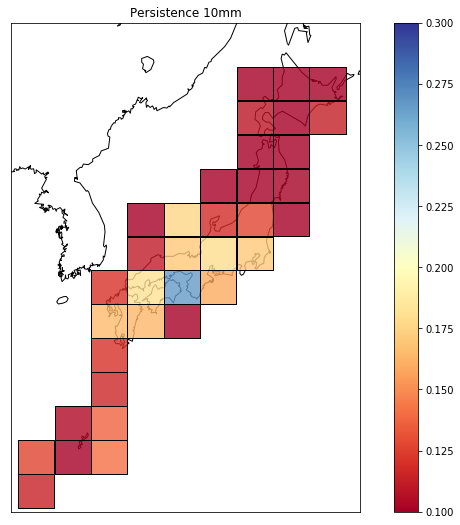

In [48]:
vname = "Persistence 10mm"
vmin = 0.1
vmax = 0.3
cmap=plt.cm.RdYlBu
plot_metrics_map(df_merged,vname,vmin,vmax,cmap)

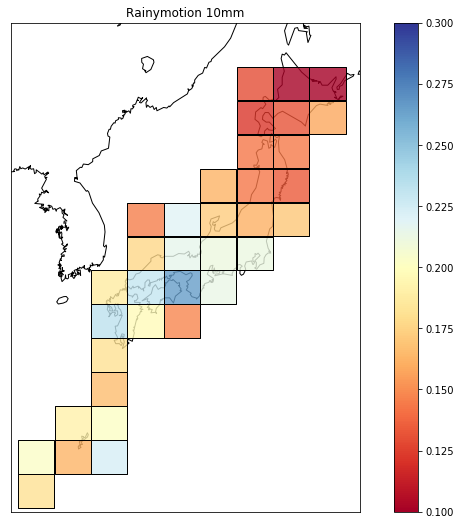

In [49]:
vname = "Rainymotion 10mm"
vmin = 0.1
vmax = 0.3
cmap=plt.cm.RdYlBu
plot_metrics_map(df_merged,vname,vmin,vmax,cmap)

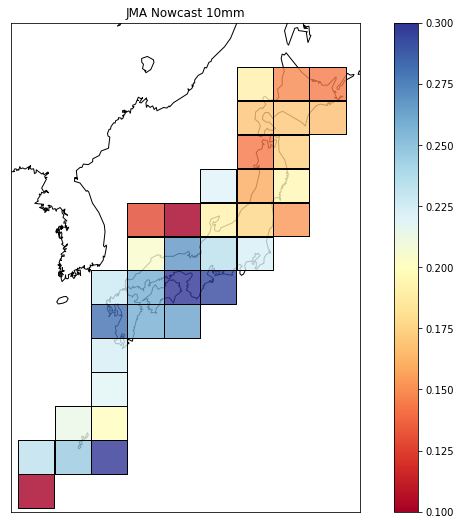

In [50]:
vname = "JMA Nowcast 10mm"
cmap=plt.cm.RdYlBu
plot_metrics_map(df_merged,vname,vmin,vmax,cmap)

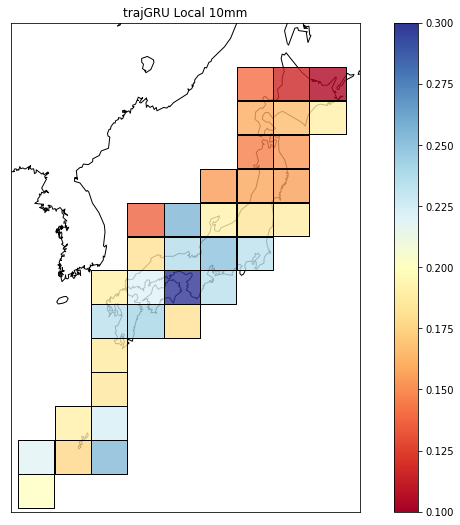

In [51]:
vname = "trajGRU Local 10mm"
cmap=plt.cm.RdYlBu
plot_metrics_map(df_merged,vname,vmin,vmax,cmap)

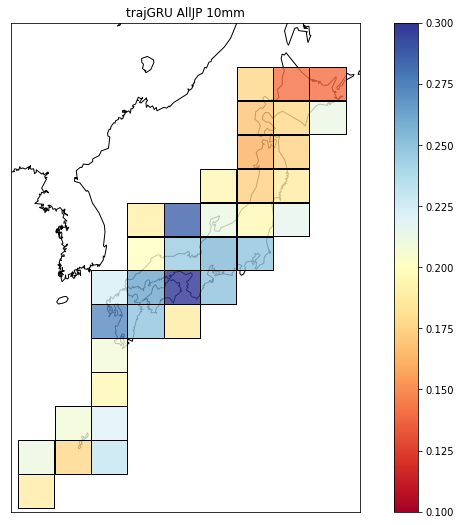

In [52]:
vname = "trajGRU AllJP 10mm"
plot_metrics_map(df_merged,vname,vmin,vmax,cmap)

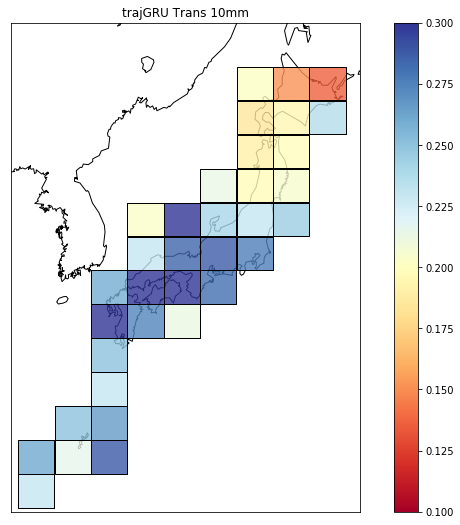

In [53]:
vname = "trajGRU Trans 10mm"
plot_metrics_map(df_merged,vname,vmin,vmax,cmap)

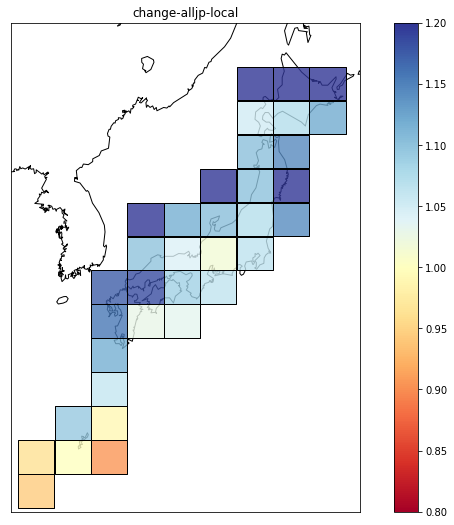

In [54]:
vname = "change-alljp-local"
vmin = 0.8
vmax = 1.2
cmap=plt.cm.bwr_r
plot_metrics_map(df_merged,vname,vmin,vmax)

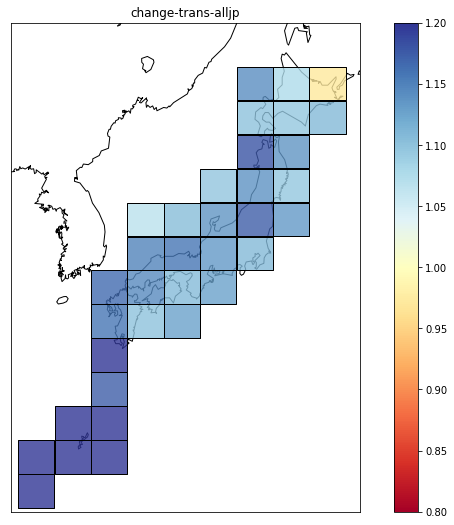

In [55]:
vname = "change-trans-alljp"
vmin = 0.8
vmax = 1.2
cmap=plt.cm.bwr_r
plot_metrics_map(df_merged,vname,vmin,vmax)